In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [2]:
df = pd.read_csv('fandango_score_comparison.csv')
df.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


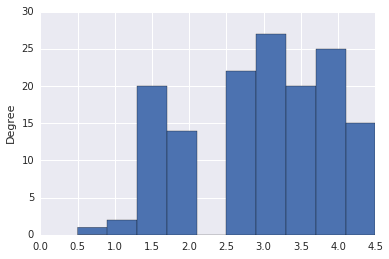

In [3]:
df['Metacritic_norm_round'].plot(kind='hist')
sns.plt.show()

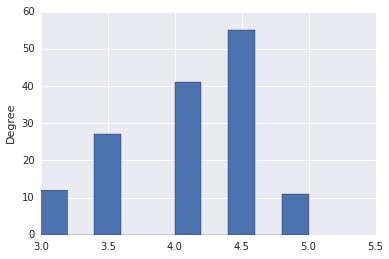

In [4]:
df['Fandango_Stars'].plot(kind='hist')
sns.plt.show()

In [5]:
print(df['Metacritic_norm_round'].mean())
print(df['Metacritic_norm_round'].median())
print(df['Metacritic_norm_round'].std())

2.97260273973
3.0
0.990960561374


In [6]:
print(df['Fandango_Stars'].mean())
print(df['Fandango_Stars'].median())
print(df['Fandango_Stars'].std())

4.08904109589
4.0
0.540385977979


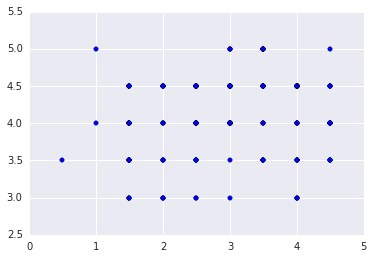

In [7]:
plt.scatter(df['Metacritic_norm_round'], df['Fandango_Stars'])
sns.plt.show()

In [8]:
df["fm_diff"] = np.abs(df["Metacritic_norm_round"] - df["Fandango_Stars"])
df.sort("fm_diff", ascending=False).head(5)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference,fm_diff
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.20,...,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5,4
85,Little Boy (2015),20,81,30,5.9,7.4,4.5,4.3,1.00,4.05,...,1.0,4.0,1.5,3.0,3.5,38,5927,811,0.2,3
47,Annie (2014),27,61,33,4.8,5.2,4.5,4.2,1.35,3.05,...,1.5,3.0,1.5,2.5,2.5,108,19222,6835,0.3,3
19,Pixels (2015),17,54,27,5.3,5.6,4.5,4.1,0.85,2.70,...,1.0,2.5,1.5,2.5,3.0,246,19521,3886,0.4,3
134,The Longest Ride (2015),31,73,33,4.8,7.2,4.5,4.5,1.55,3.65,...,1.5,3.5,1.5,2.5,3.5,49,25214,2603,0.0,3


In [9]:
r, p = stats.pearsonr(df['Metacritic_norm_round'], df['Fandango_Stars'])
r

0.17844919073895918

In [10]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df['Metacritic_norm_round'], df['Fandango_Stars'])
slope, intercept, r_value, p_value, std_err

(0.097311077973928267,
 3.7997739188994188,
 0.17844919073895882,
 0.031161516228524384,
 0.044713544656798304)

In [11]:
slope * 3.0 + intercept

4.0917071528212041

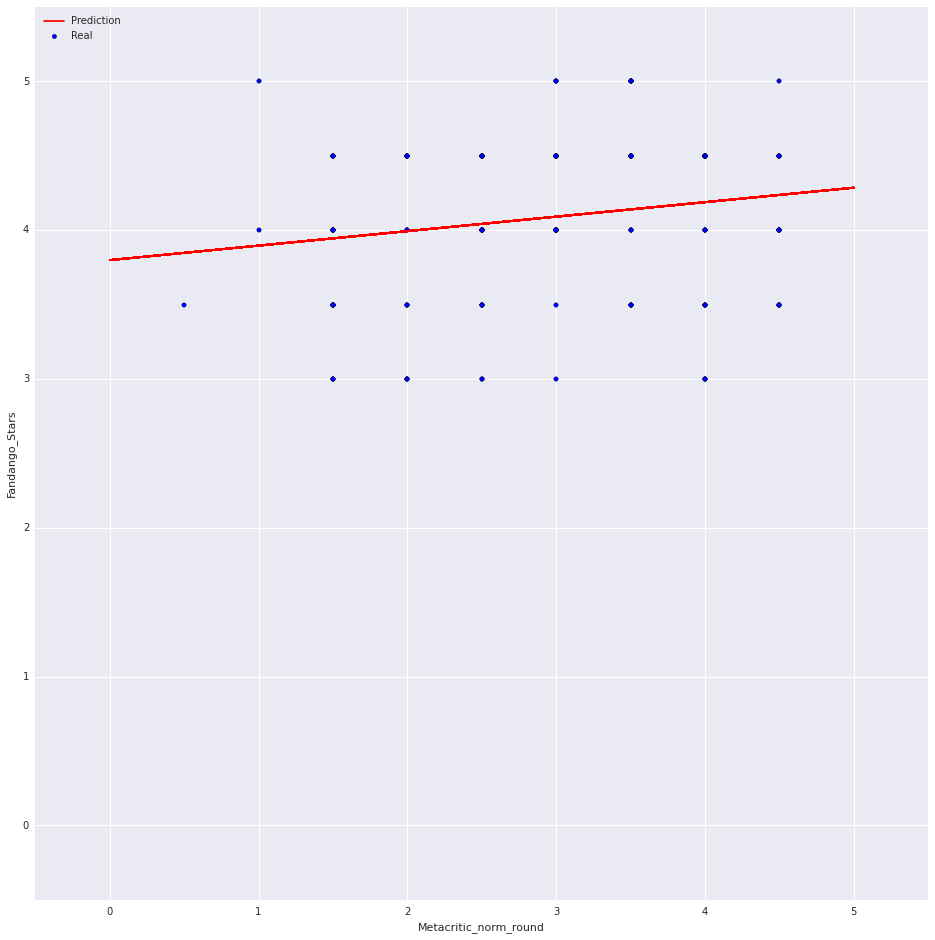

In [12]:
random.seed(1)
random_100 = [random.randint(0, 5) for _ in range(100)]
random_100_x = np.array(random_100)
random_100_y = random_100_x * slope + intercept
fig = plt.figure(figsize=(16, 16))
ax = fig.add_subplot(111)
ax.plot(random_100_x, random_100_y, c='r', label='Prediction')
ax.scatter(df['Metacritic_norm_round'], df['Fandango_Stars'], c='b', label='Real')
plt.legend(loc='upper left');
plt.xlabel('Metacritic_norm_round')
plt.ylabel('Fandango_Stars')
ax.set_xlim([-0.5, 5.5])
ax.set_ylim([-0.5, 5.5])
sns.plt.show()